# General Universal Jastrow Factor Notes

In [1]:
from IPython.display import Markdown, display
from load_data import load_data_with_uncertainties
import numpy as np
from matplotlib import pyplot as plt


In [2]:
display(Markdown("todo"))

data I plan to include:

atomisation energies for N2, CN, C2
- just one or two of the methodologies?

binding curves for N2, for:
- universal Fournais Jastrow
- universal e-e only Jastrow
- universal e-e + e-n CASINO jastrow
- atomic Jastrow, no extra opt
- atomic Jastrow, en and een only, opt ee for molecule
- atomic Jastrow, en and een only, opt ee multidet casci for molecule? (not casscf to keep orbitals consistent with atom!)
- plot curve(s) with HEAT result as horizontal line to show that some of them are nonvariational
- check polynomial cutoff calculations:
  - /algpfs1/phaupt/neci/meanfield/bind/size_consistent/N2_universal_casino_eeLpolynomial*_s0/augccpvtz/2.08/


## Binding Curves

### Universal Jastrows

We have three options for the universal Jastrow
- Fournais
- e-e only
- e-e + CASINO e-n (orbital-dependent)

I am testing it with various options for the cutoffs, primarily polynomial and gaussians. We want to choose a universal Jastrow form (or two) to do the full N2 binding curve as well as some atomic calculations

#### Cutoff Analysis

We want the cutoff values to be very small, so as to not affect the rest of the molecule, since it should only handle coalescence. We consider the polynomial cutoff $(1-r/L)^3$ and the gaussian cutoff $e^{-r^2/L^2}$.

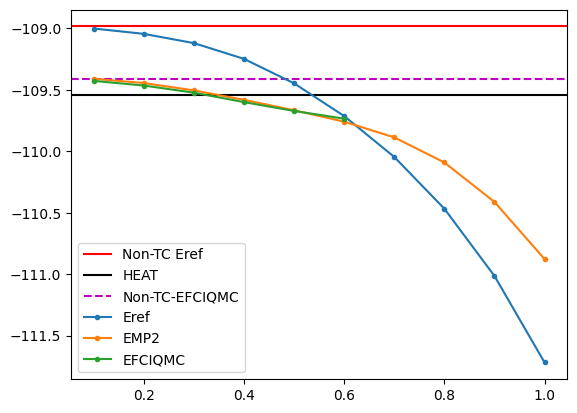

In [24]:
# gaussian cutoff data
data_gauss = load_data_with_uncertainties("data/universal_gauss_cutoff_energies.dat", uncertainty_cols=[3])
plt.axhline(y=-108.98408566080087, color='r', linestyle='-', label="Non-TC Eref")
plt.axhline(y=-109.5425, color='k', linestyle='-', label="HEAT")
plt.axhline(y=-109.412216, color='m', linestyle='--', label="Non-TC-EFCIQMC")
plt.plot(data_gauss[:,0], data_gauss[:,1], '.-', label="Eref")
plt.plot(data_gauss[:,0], data_gauss[:,2], '.-', label="EMP2")
plt.plot(data_gauss[:,0], [x.n for x in data_gauss[:,3]], '.-', label="EFCIQMC")
plt.legend()

Do a similar cutoff analysis for the atom...
`N_universal_casino_eeLgauss*_s3/augccpvtz/`

I ran a full curve for L=0.1 Gaussian cutoffs, but I might cancel it for now to do a cutoff analysis on the atom
`/algpfs1/phaupt/neci/meanfield/bind/size_consistent/N2_universal_casino_fullcurve_eeLgaussian0.1_s0/augccpvtz`

Keeping the L=0.1 running for now, but doing the atomic cutoff analysis in parallel, hoping to get something meaningful